# Predicting Employee Turnover using Data

This project aims to:
- showcase some typical insights that can be mined from an anonymised employee database
- understand who and why are employees leaving
- demonstrate the use of machine learning techniques in predicting employee turnover

## 1. Load & clean data

In [85]:
file = 'HR_comma_sep.csv'

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [87]:
data = pd.read_csv(file)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [88]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [90]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [91]:
# Correct some spelling errors & rename some columns:
data.rename(columns={'average_montly_hours':'average_monthly_hours', 'sales':'dept', 'Work_accident':'accident'}, inplace=True)

In [92]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [93]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [94]:
# Convert salary categories into 1/2/3
data.salary = data.salary.map(lambda x: 1 if x == 'low' else 2 if x == 'medium' else 3)

In [95]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


## 2. Explore some patterns within the data

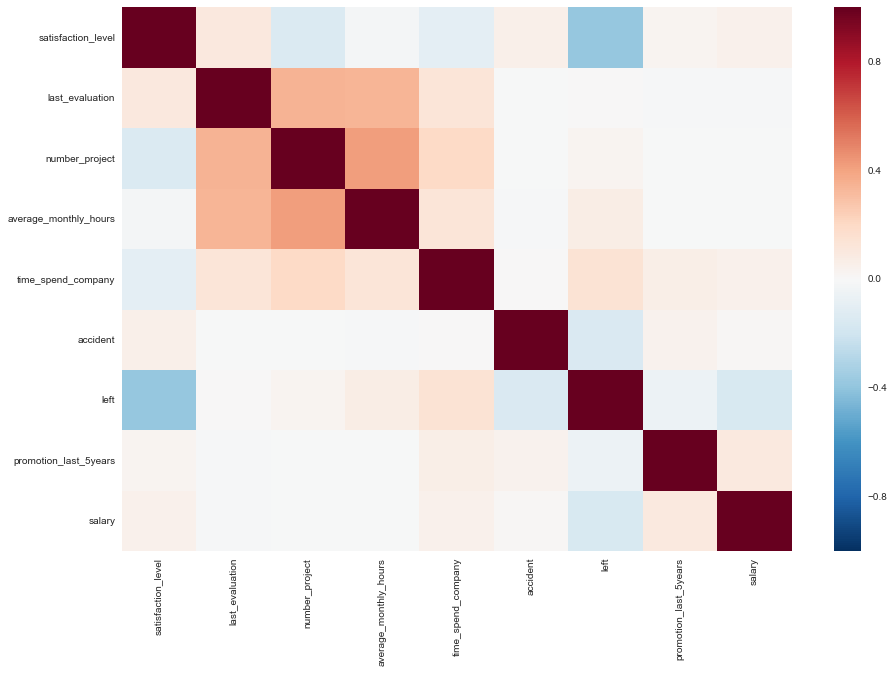

In [96]:
fig, ax = plt.subplots(figsize=(15,10)) 

sns.heatmap(data.corr(), ax=ax)
plt.show()
fig.savefig('HR_heatmap.png')
# There seems to be some negative correlation between job satisfaction and those who left. Makes sense. 

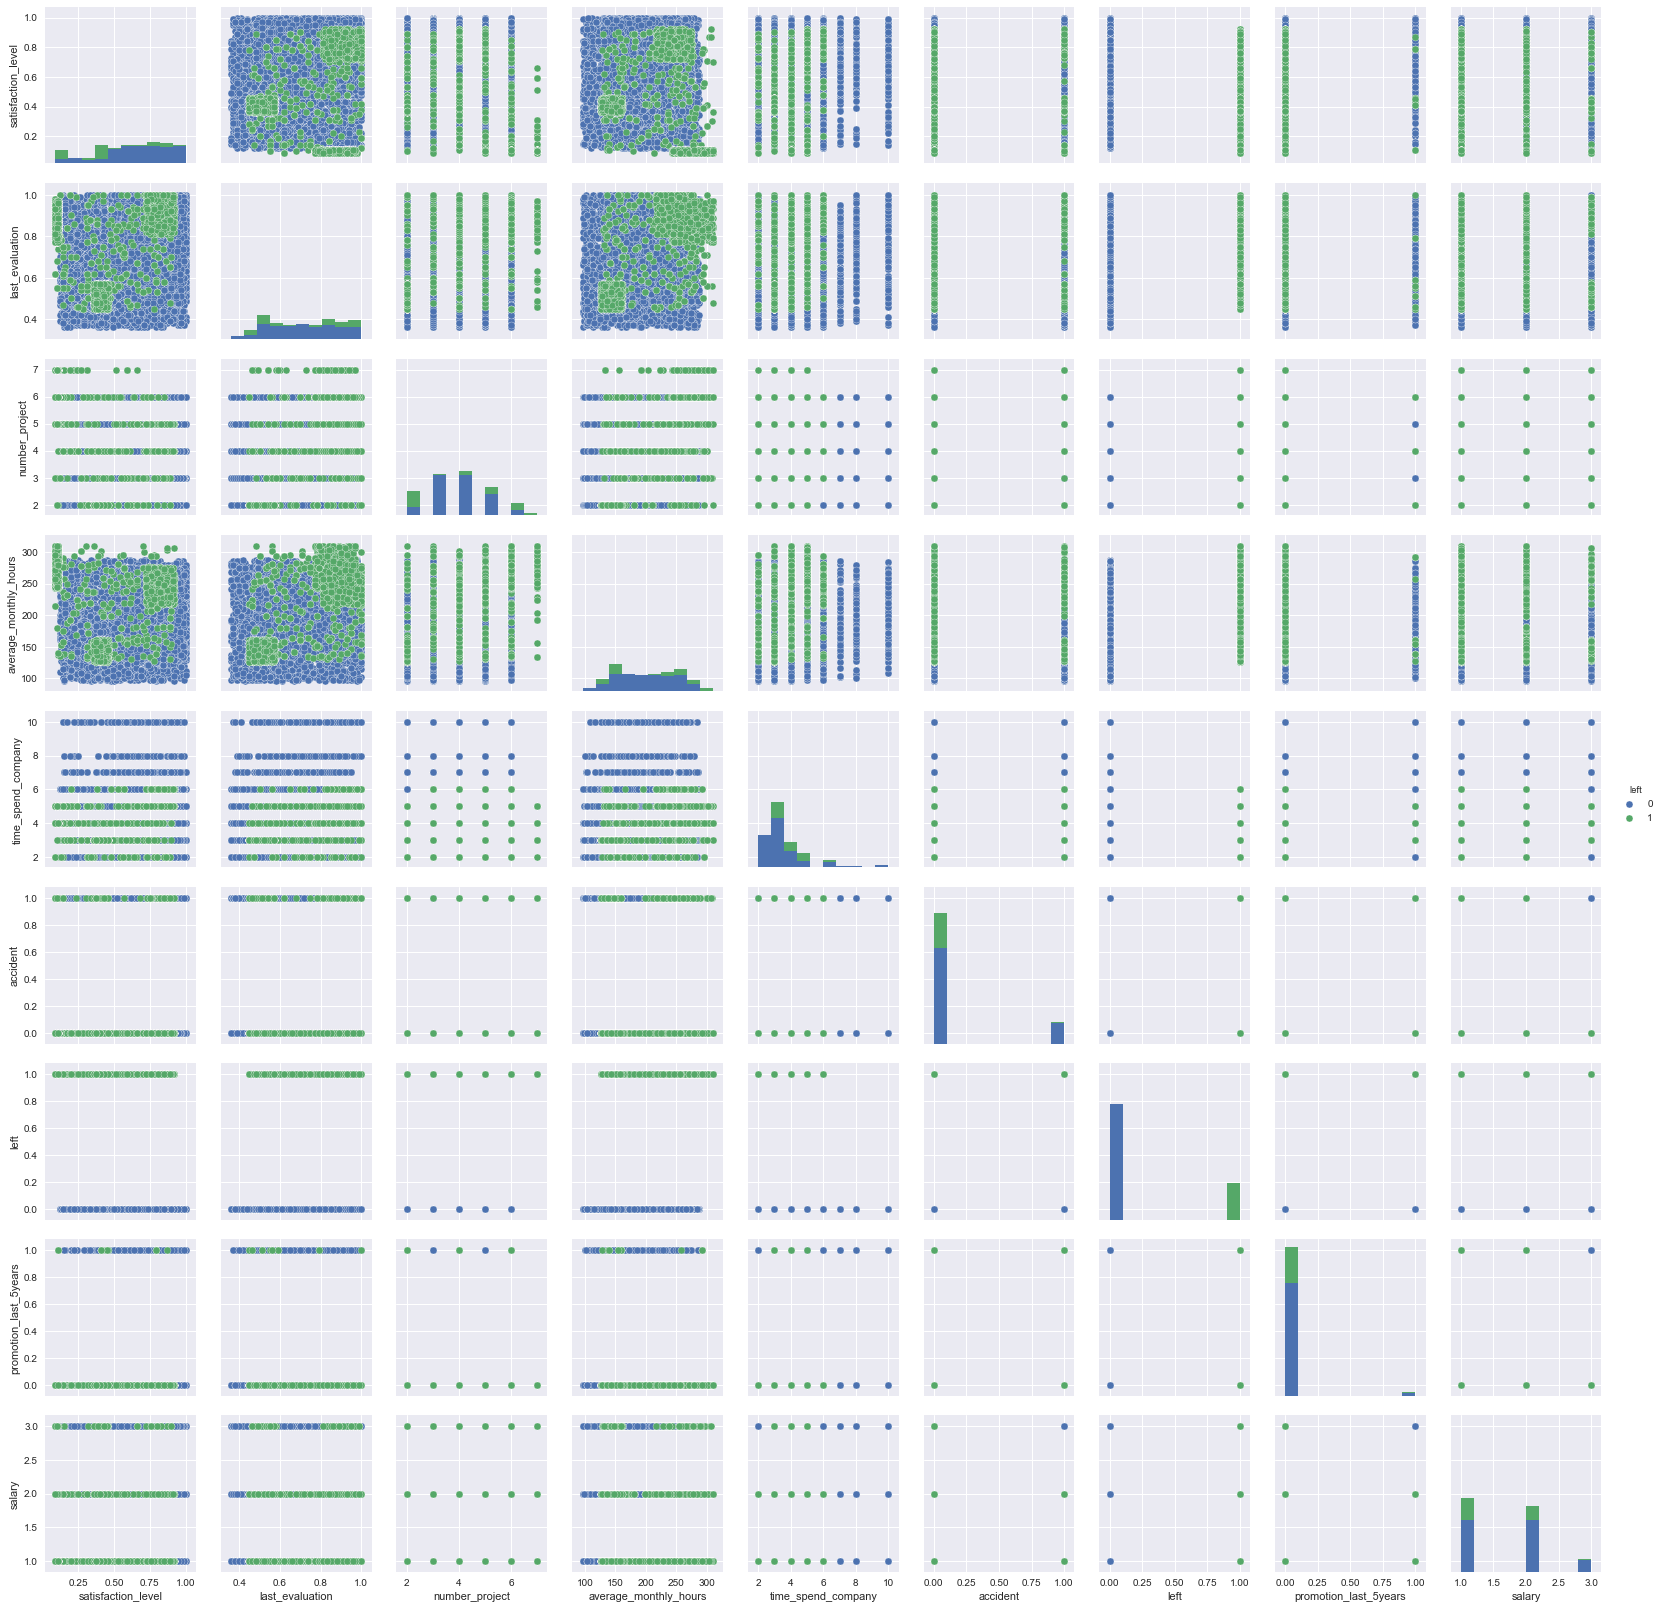

In [97]:
fig = sns.pairplot(data, hue='left', kind='scatter')
plt.show()
fig.savefig('HR_pairplot.png')

# Graph of working hours against last evaluation looks interesting. Let's explore this further

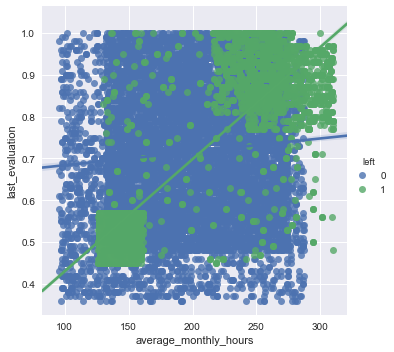

In [98]:
fig = sns.lmplot(y='last_evaluation', x='average_monthly_hours', data=data, hue='left')
fig.savefig('HR_implot1.png')
# Employees that left displayed much higher correlation between average monthly working hours against last evaluation score 

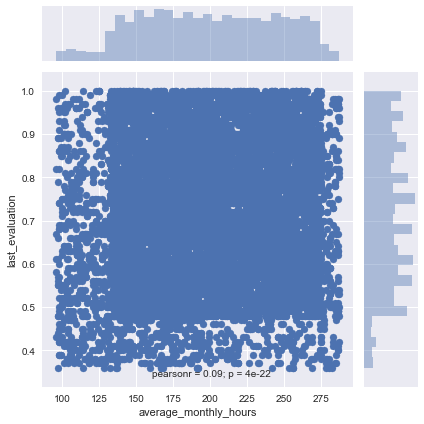

In [99]:
fig = sns.jointplot(y='last_evaluation', x='average_monthly_hours', data=data[data['left']==0], kind='scatter')
fig.savefig('HR_implot2.png')
# Looking at the employees that stayed, can also observe that most employees tend to work between 130~275 hours every month 
# However, pearsonR is only 0.09! Facetime seems to be quite useless and working longer hours does not neccesarily mean better reviews!

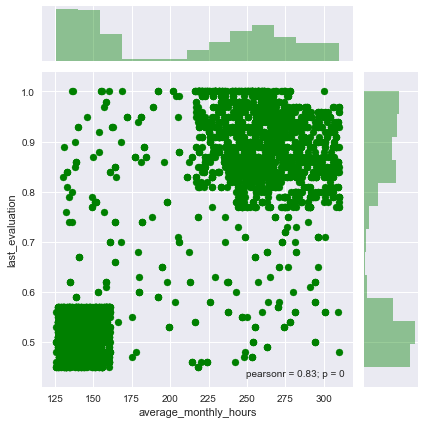

In [100]:
fig = sns.jointplot(y='last_evaluation', x='average_monthly_hours', data=data[data['left']==1], kind='scatter', color='green', )
fig.savefig('HR_implot3.png')
# We can clearly observe 2 clear groups of employees that leave. Top right are those that work hard & perform well(ambitious rockstars that jump ship) and those that work little and perform poorly(unmotivated hence leave/fired?)

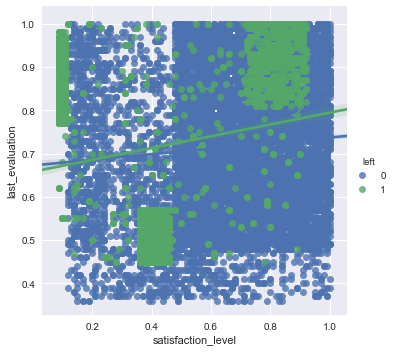

In [101]:
sns.lmplot(y='last_evaluation', x='satisfaction_level', data=data, hue='left')

### Let's explore satisfaction levels

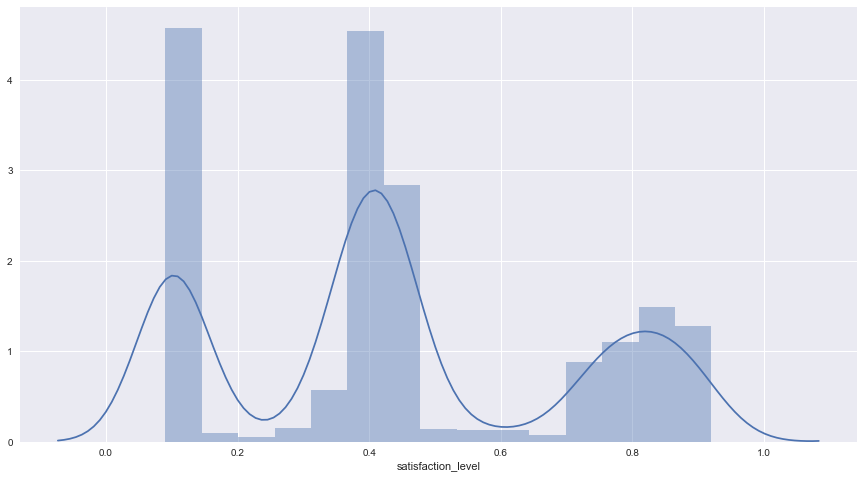

In [102]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['satisfaction_level'][data['left']==1], bins=15)

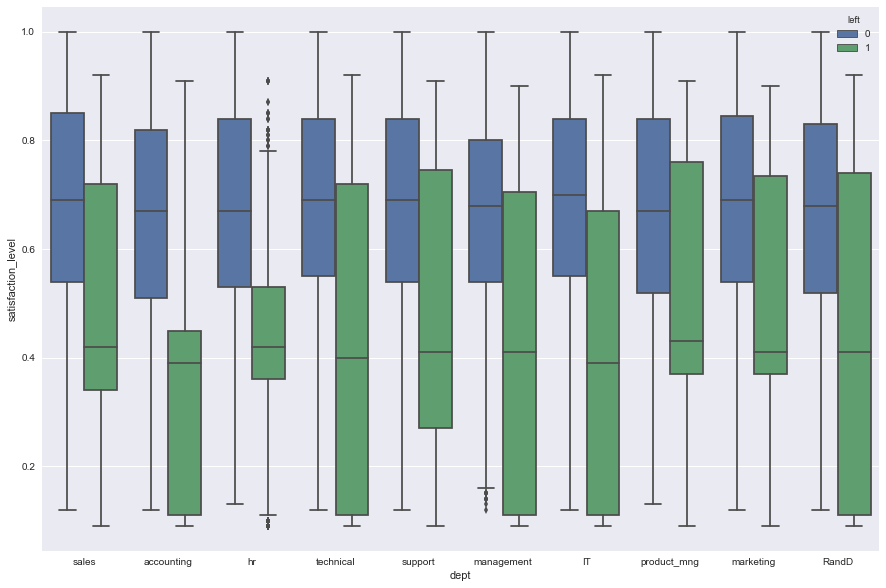

In [103]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.boxplot(x='dept', y='satisfaction_level', data=data, hue='left')
fig.savefig('HR_boxplot1.png')

# Satisfaction levels for employees that stayed seem to be quite consistent across departments
# Significant drop in satisfaction levels for employees that left
# Accounting and HR departments seem to have the biggest percentile differences between those that left and those that stayed. Must pay particular sttention to their unsatisfied employees

### Let's compare the last evaluation scores

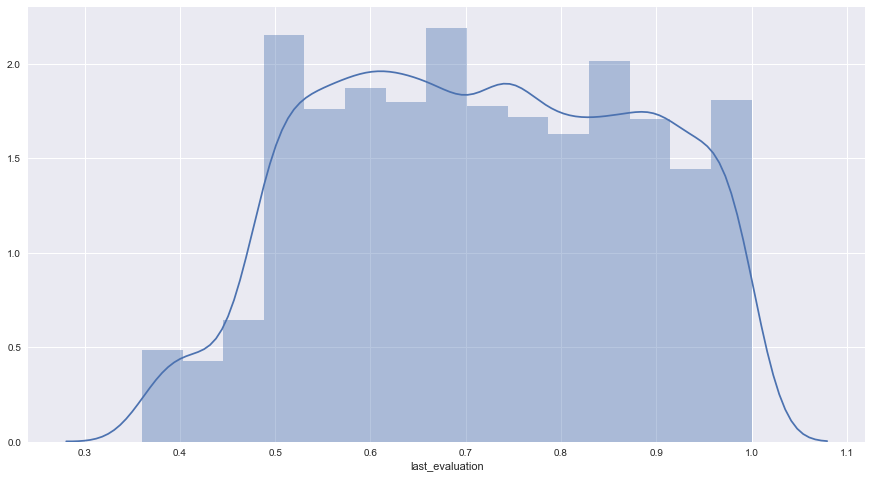

In [104]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['last_evaluation'][data['left']==0], bins=15)

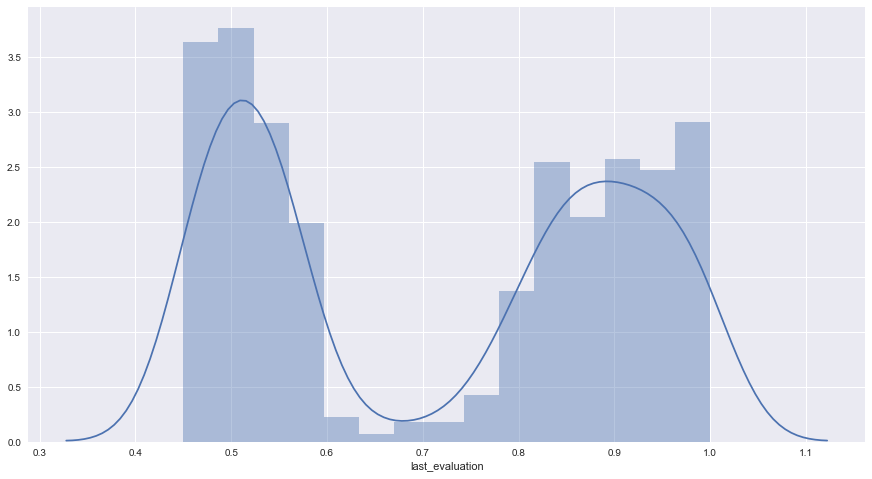

In [105]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['last_evaluation'][data['left']==1], bins=15)

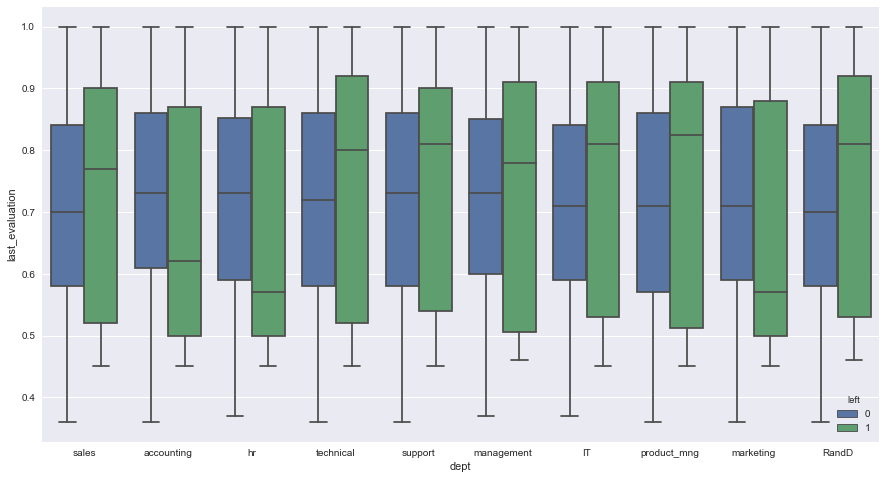

In [106]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.boxplot(x='dept', y='last_evaluation', data=data, hue='left')

# nothing significant

### Let's analyse employee tenure

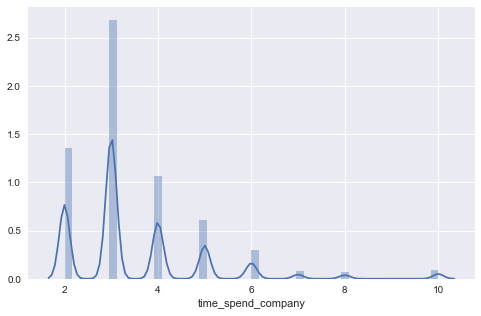

In [107]:
fig, ax = plt.subplots(figsize=(8,5)) 
ax = sns.distplot(data.time_spend_company)
fig.savefig('HR_dist1')
# Most employees in this company are quite junior

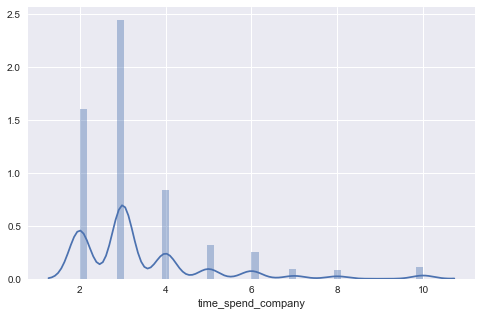

In [108]:
fig, ax = plt.subplots(figsize=(8,5)) 
ax = sns.distplot(data['time_spend_company'][data['left']==0])


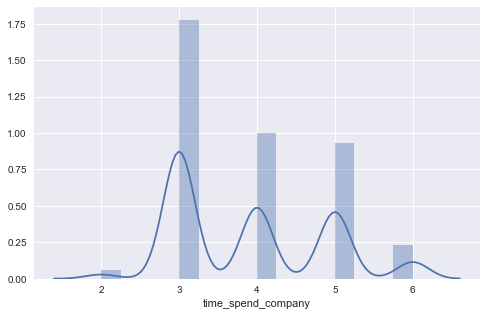

In [109]:
fig, ax = plt.subplots(figsize=(8,5)) 
ax = sns.distplot(data['time_spend_company'][data['left']==1])
fig.savefig('HR_dist2')
# Most employees start leaving after 3 years. 3 year mark is particularly significant.  

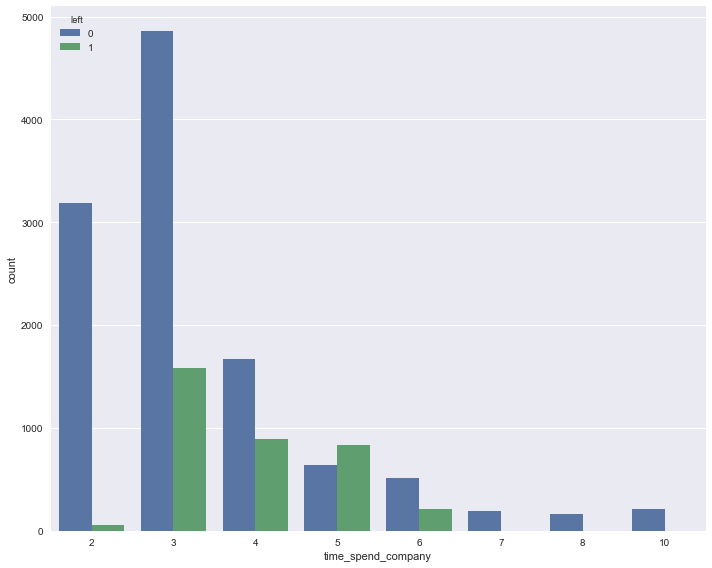

In [110]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='time_spend_company', hue='left', data=data)
plt.tight_layout()
fig.savefig('HR_dist3')

### Let's explore salaries

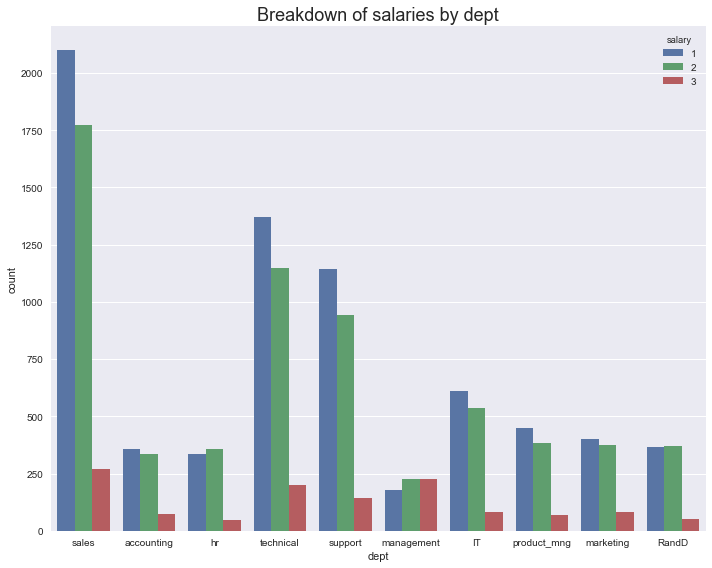

In [111]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='dept', hue='salary', data=data)
plt.title('Breakdown of salaries by dept', fontsize=18)
plt.tight_layout()

# Only management is well paid!
# Sale technical and support have the most employees

In [112]:
# change to stacked bars

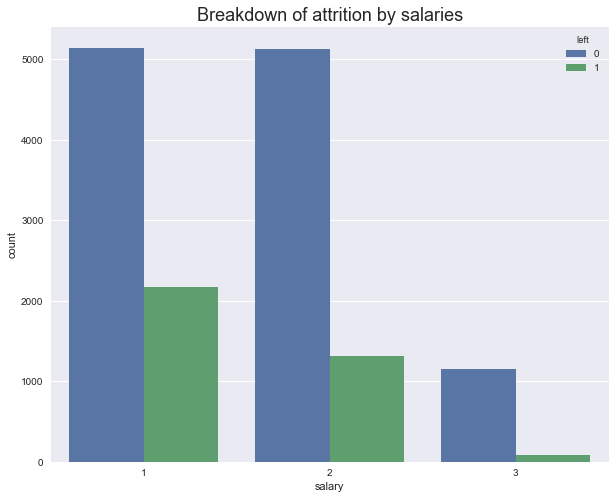

In [113]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='salary', hue='left', data=data)
plt.title('Breakdown of attrition by salaries', fontsize=18)

# The higher the salary, the lower the attrition

## Number of projects

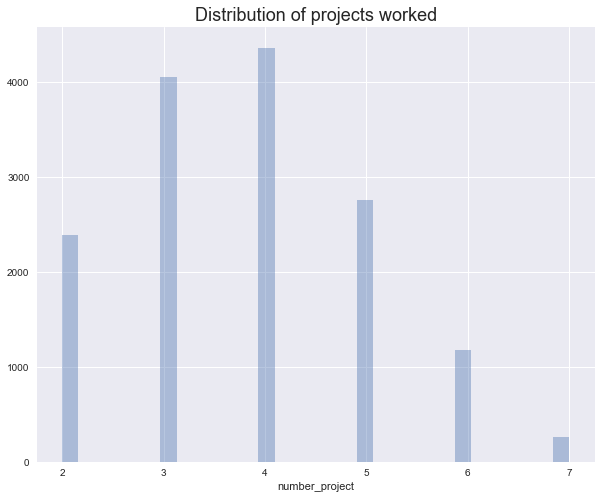

In [114]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(data['number_project'], kde=False)
plt.title('Distribution of projects worked', fontsize=18)
fig.savefig('HR_dist4')

# Most employees work between 3~4 projects a year
# right skewed distribution >>> either most projects are short OR company is slavedriver???

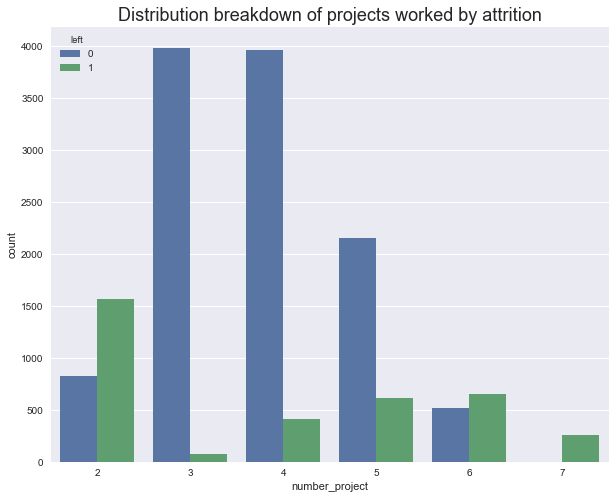

In [115]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='number_project', hue='left', data=data,)
plt.title('Distribution breakdown of projects worked by attrition', fontsize=18)
fig.savefig('HR_dist5')

# Most employees that left either worked on many projects or very few projects. attrition rate for those that worked on 3 projects is surprisingly low.
# Those that worked on 7 projects ALL resigned!

## Departments

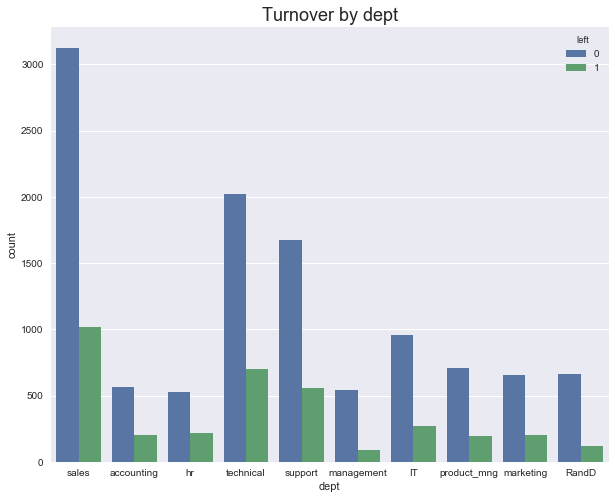

In [116]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='dept', data=data, hue='left')
plt.title('Turnover by dept', fontsize=18)

# nothing significant

## 3. Preprocessing

In [117]:
# check the dataset again
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [118]:
print data[data['left']==1].shape
print data[data['left']==0].shape

# slightly imbalanced dataset
float(data[data['left']==1].shape[0])/data.shape[0]

(3571, 10)
(11428, 10)


0.2380825388359224

### Baseline score is 0.76

In [119]:
# get dummies for dept column
dept = pd.get_dummies(data['dept'], drop_first=True)
dept.head()

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [120]:
# get dummies for salary column
salary = pd.get_dummies(data['salary'], drop_first=True)
salary.rename(columns={2:'salary_med', 3:'salary_high'}, inplace=True)
salary.head()

,salary_med,salary_high
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0


In [121]:
data_processed = data.drop(['dept', 'salary'], axis=1)
data_processed.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [122]:
data_processed = pd.concat([data_processed, dept, salary], axis=1)
data_processed.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,accident,left,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary_med,salary_high
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [123]:
# separate the data into X and y
X = data_processed.drop(['left'], axis=1)
y = data_processed['left']

In [124]:
# Some feature selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif

skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

skb_f.fit(X, y)
skb_chi2.fit(X, y)

cols = list(data_processed.columns)
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest

,feature,f_classif,chi2 score
0,satisfaction_level,2663.88,228.193
5,accident,367.328,306.738
4,time_spend_company,321.277,191.709
17,salary_med,222.57,201.255
3,average_monthly_hours,76.602,945.589
16,technical,71.3937,40.5239
6,left,57.4745,56.0449
7,promotion_last_5years,32.6317,30.8565
10,hr,31.85,30.4516
9,accounting,11.977,11.3794


### Logistic Regression

In [125]:
# import libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [126]:
# perform scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.4706553 ,
        -0.8681323 , -0.29980859],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.4706553 ,
         1.15189816, -0.29980859],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.4706553 ,
         1.15189816, -0.29980859],
       ..., 
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.4706553 ,
        -0.8681323 , -0.29980859],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.4706553 ,
        -0.8681323 , -0.29980859],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.4706553 ,
        -0.8681323 , -0.29980859]])

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [128]:
# instantiate the object 
log_reg = LogisticRegression()

rfe = RFE(log_reg, 5)
# fit model to training data
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [129]:
rfe.predict(X_test)[0:50]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [130]:
y_test[0:50]

6723     0
6473     0
4679     0
862      1
7286     0
8127     0
3017     0
3087     0
6425     0
2250     0
542      1
9293     0
11723    0
4923     0
12070    1
10602    0
11874    0
11118    0
10778    0
8054     0
2312     0
14768    1
1889     1
8990     0
169      1
1795     1
14303    1
3919     0
14018    0
3728     0
1039     1
2848     0
7864     0
12036    1
10411    0
8796     0
764      1
1593     1
9214     0
7113     0
10360    0
5145     0
10908    0
11488    0
9881     0
8473     0
149      1
13591    0
387      1
12374    1
Name: left, dtype: int64

In [131]:
print ('num of features: %d') %rfe.n_features_
print ('selected features: %s') %rfe.support_
print ('feature ranking: %s') %rfe.ranking_

num of features: 5
selected features: [ True False False False False  True  True  True False False False False
 False False False False False  True]
feature ranking: [ 1  2  7 14  6  1  1  1  8  4  5 10 13 12 11  9  3  1]


In [132]:
X

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,accident,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary_med,salary_high
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0.10,0.77,6,247,4,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0.92,0.85,5,259,5,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0.89,1.00,5,224,5,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0.42,0.53,2,142,3,0,0,0,0,0,0,0,0,1,0,0,0,0


In [133]:
# Model accuracy
rfe.score(X_test, y_test)

0.77093333333333336

In [134]:
# check confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, rfe.predict(X_test))

array([[5347,  386],
       [1332,  435]], dtype=int64)

In [135]:
from sklearn.metrics import classification_report

print classification_report(y_test, rfe.predict(X_test))

             precision    recall  f1-score   support

          0       0.80      0.93      0.86      5733
          1       0.53      0.25      0.34      1767

avg / total       0.74      0.77      0.74      7500



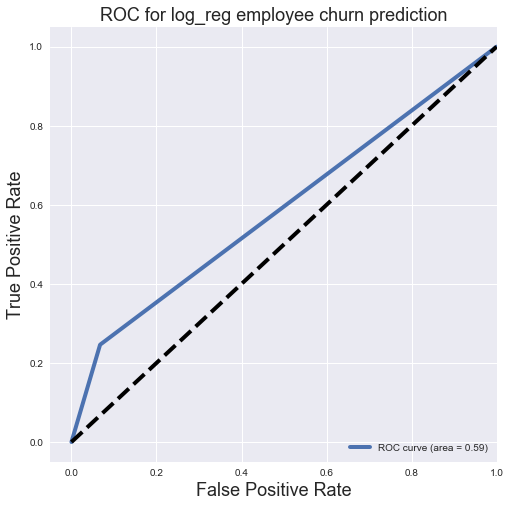

In [136]:
from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, rfe.predict(X_test))
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (employees churned)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for log_reg employee churn prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### Recall of 0.25 for 1 indicates low sensistivity likely to be caused by imbalanced dataset

#### Train model again but with SMOTE over sampling

In [137]:
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [138]:
# instantiate the object 
log_reg = LogisticRegression()

rfe = RFE(log_reg, 5)
# fit model to training data
rfe.fit(X_train_res, y_train_res)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [139]:
rfe.score(X_test, y_test)

0.69640000000000002

In [140]:
# check confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, rfe.predict(X_test))

array([[4023, 1710],
       [ 567, 1200]], dtype=int64)

In [141]:
from sklearn.metrics import classification_report

print classification_report(y_test, rfe.predict(X_test))

             precision    recall  f1-score   support

          0       0.88      0.70      0.78      5733
          1       0.41      0.68      0.51      1767

avg / total       0.77      0.70      0.72      7500



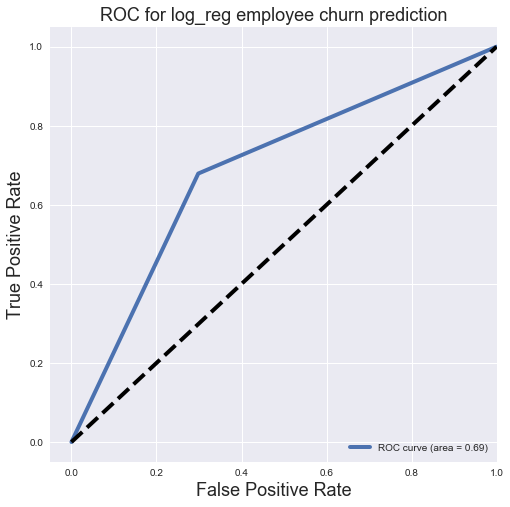

In [142]:
from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, rfe.predict(X_test))
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (employees churned)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for log_reg employee churn prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### kNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [144]:
knn5.predict(X_test)[0:50]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1], dtype=int64)

In [145]:
y_test

6723     0
6473     0
4679     0
862      1
7286     0
8127     0
3017     0
3087     0
6425     0
2250     0
542      1
9293     0
11723    0
4923     0
12070    1
10602    0
11874    0
11118    0
10778    0
8054     0
2312     0
14768    1
1889     1
8990     0
169      1
1795     1
14303    1
3919     0
14018    0
3728     0
        ..
2867     0
2526     0
9955     0
12964    0
8290     0
13038    0
1168     1
4144     0
5149     0
84       1
3149     0
12627    1
880      1
6747     0
9282     0
6535     0
14332    1
9055     0
1467     1
11876    0
5641     0
6537     0
9417     0
452      1
4326     0
4044     0
11574    0
4137     0
3039     0
9728     0
Name: left, Length: 7500, dtype: int64

In [146]:
knn5.score(X_test, y_test)

0.93746666666666667

In [147]:
# check confusion matrix
confusion_matrix(y_test, knn5.predict(X_test))

array([[5432,  301],
       [ 168, 1599]], dtype=int64)

In [148]:
print classification_report(y_test, knn5.predict(X_test))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96      5733
          1       0.84      0.90      0.87      1767

avg / total       0.94      0.94      0.94      7500



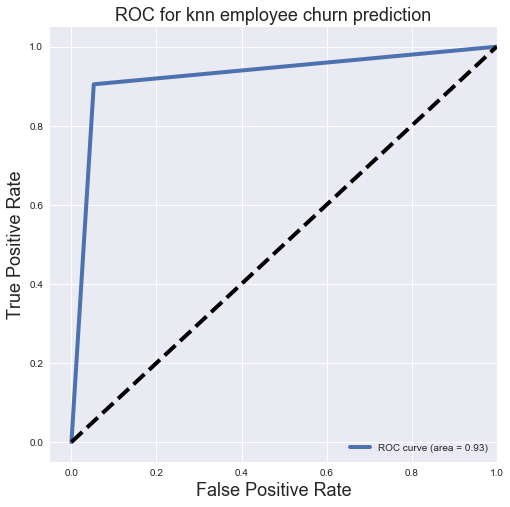

In [149]:
from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, knn5.predict(X_test))
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (employees churned)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for knn employee churn prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### SVM

In [150]:
X = data_processed.drop(['left'], axis=1)
y = data_processed['left']

In [151]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# SVC with Gaussian kernel
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [152]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [153]:
model.score(X_test, y_test)

0.94666666666666666

In [154]:
confusion_matrix(y_test, model.predict(X_test))

array([[5503,  230],
       [ 170, 1597]], dtype=int64)

In [155]:
print classification_report(y_test, model.predict(X_test))

             precision    recall  f1-score   support

          0       0.97      0.96      0.96      5733
          1       0.87      0.90      0.89      1767

avg / total       0.95      0.95      0.95      7500



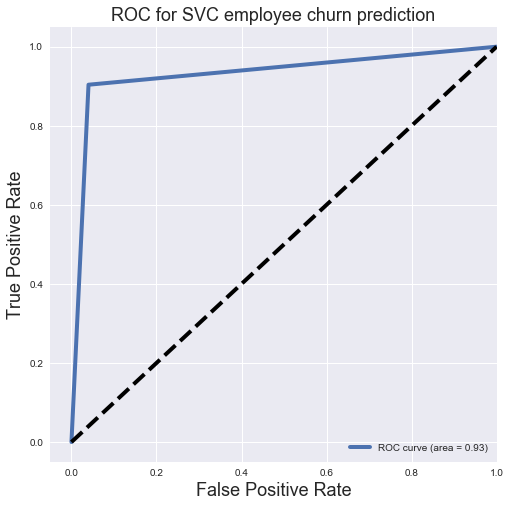

In [156]:
# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (employees churned)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for SVC employee churn prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [157]:
# Parameter tuning with Gridsearch
from sklearn.grid_search import GridSearchCV

param_grid = {'C': [0.1, 1,10,100], 'gamma':[0.1, 1, 10,100]}
grid = GridSearchCV(SVC(), param_grid, verbose=1)

E:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [158]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [159]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [160]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [161]:
grid.score(X_test, y_test)

0.96026666666666671

In [162]:
confusion_matrix(y_test, grid.predict(X_test))

array([[5557,  176],
       [ 122, 1645]], dtype=int64)

In [163]:
print classification_report(y_test, grid.predict(X_test))

             precision    recall  f1-score   support

          0       0.98      0.97      0.97      5733
          1       0.90      0.93      0.92      1767

avg / total       0.96      0.96      0.96      7500



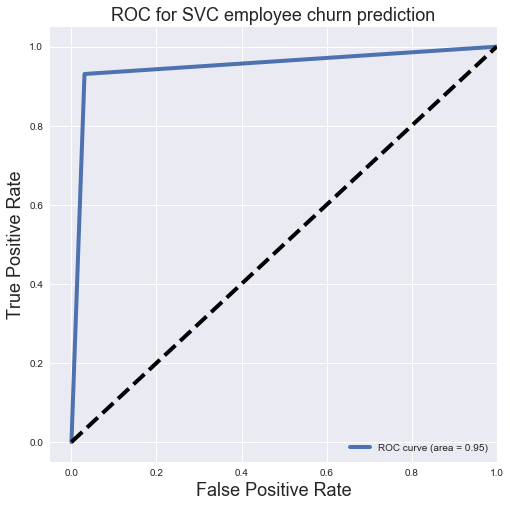

In [164]:
# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, grid.predict(X_test))
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (employees churned)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for SVC employee churn prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [80]:
grid.predict(X_test)[99:150]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0], dtype=int64)

In [81]:
np.array(y_test[99:150])

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0], dtype=int64)